#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
#importing nessasary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline
import os
import warnings 
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
def plot_data(column_name, data):
    plt.figure(figsize = (15,5))
    
    #Histogram plot using sns.histoplot()
    plt.subplot(1,3,1)
    sns.histplot(data[column_name], kde = False, bins=10)
    plt.title(f"{column_name.capitalize()} Histogram")
    
    #Distribution plot using sns.distplot()
    plt.subplot(1,3,2)
    sns.distplot(data[column_name], hist = True)
    plt.title(f"{column_name.capitalize()} Distribution plot")
    
    
    #Box plot using sns.boxplot()
    plt.subplot(1,3,3)
    sns.boxplot(data[column_name], orient = 'v')
    plt.title(f"{column_name.capitalize()} Box plot")
    
    plt.show()

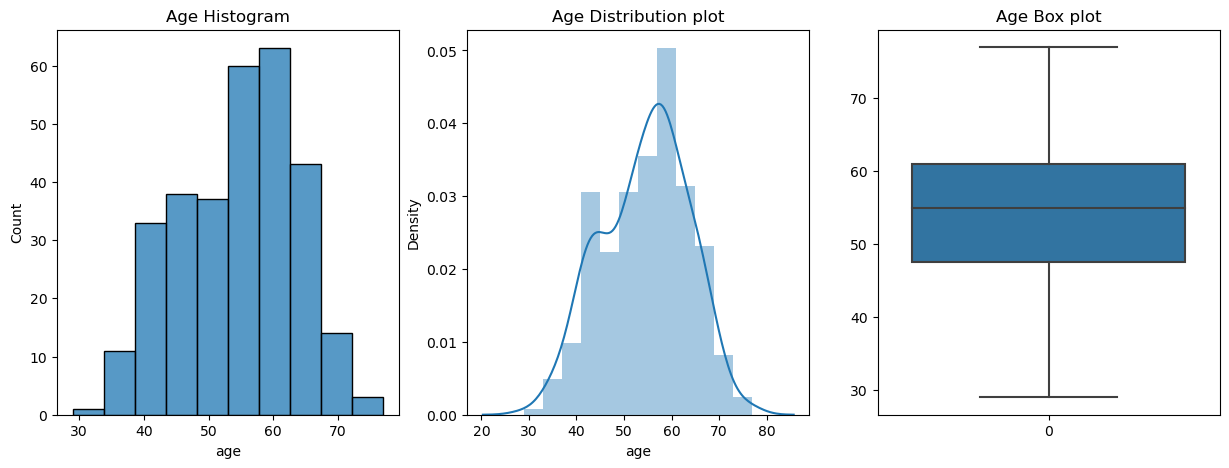

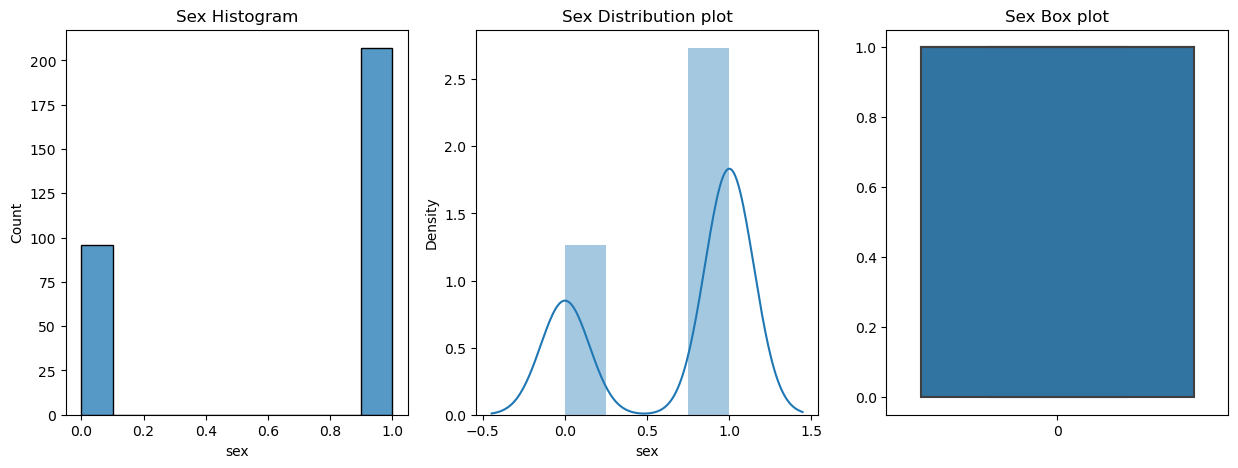

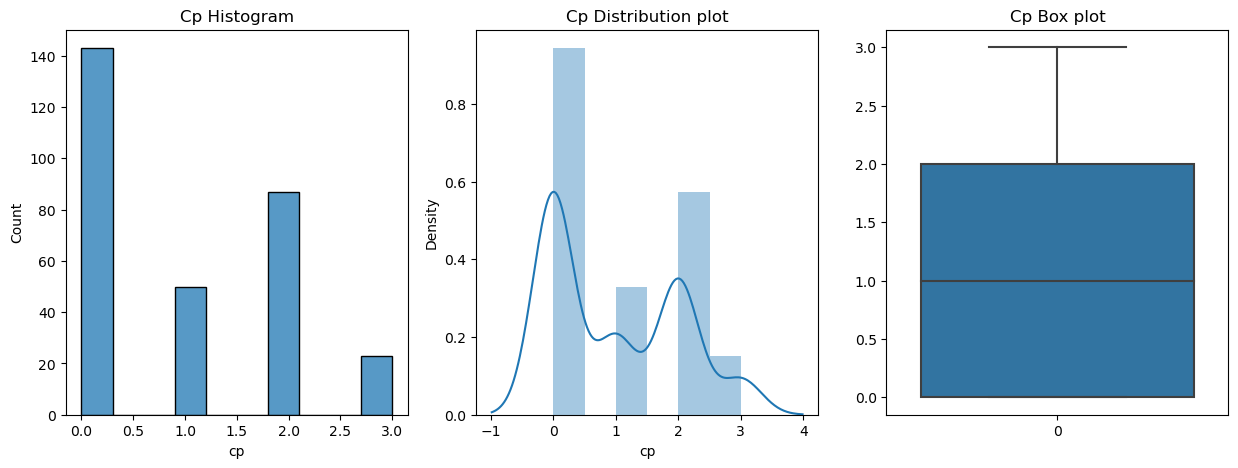

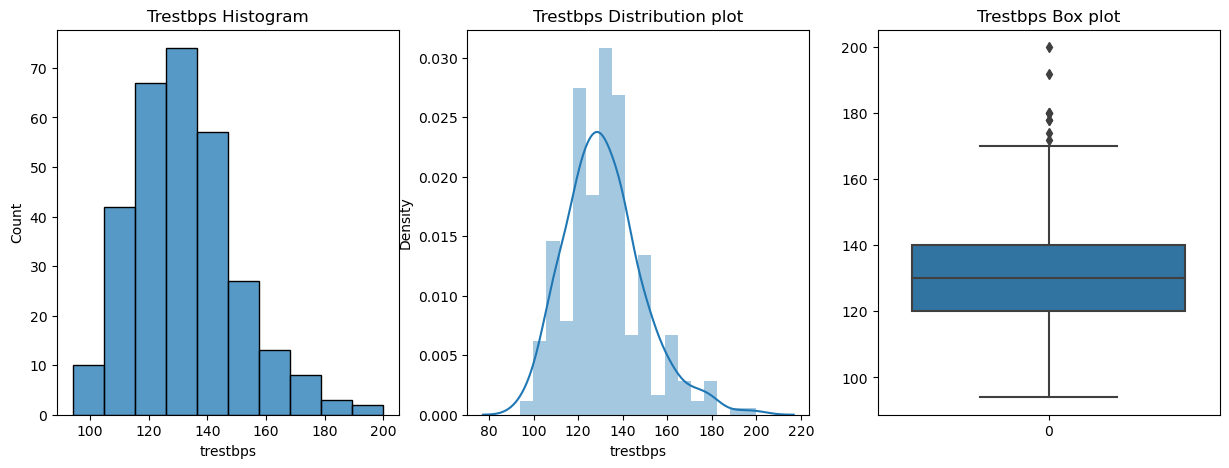

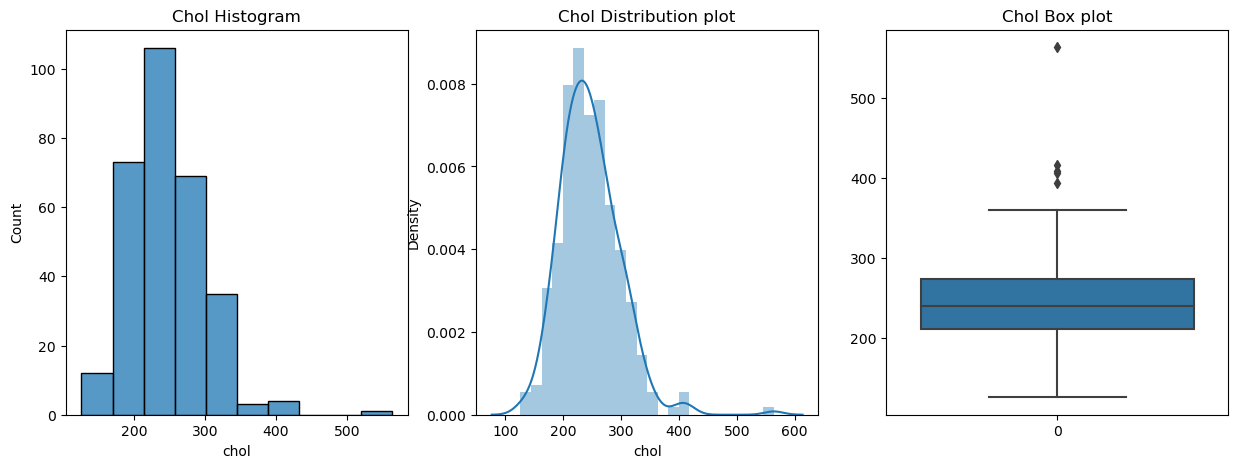

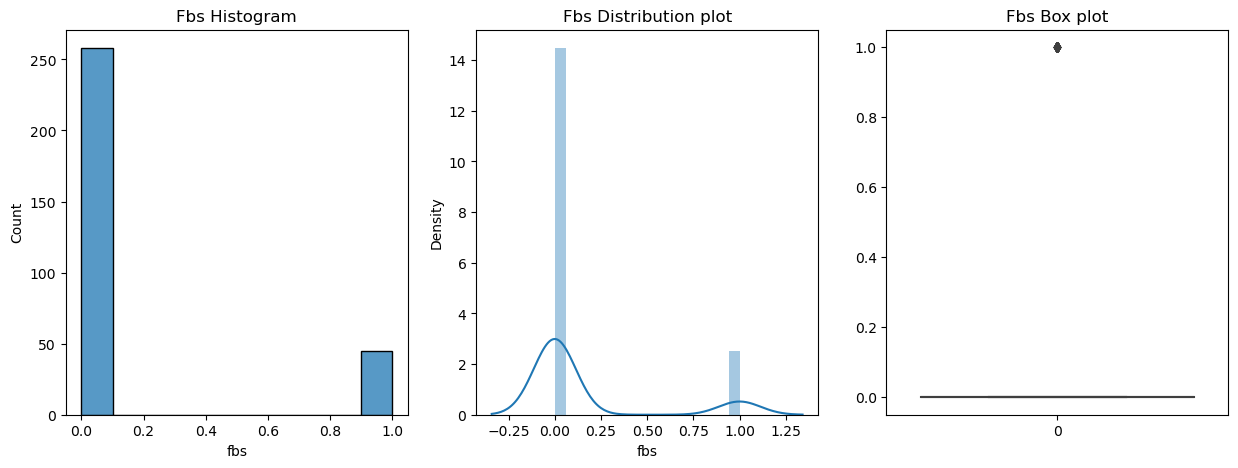

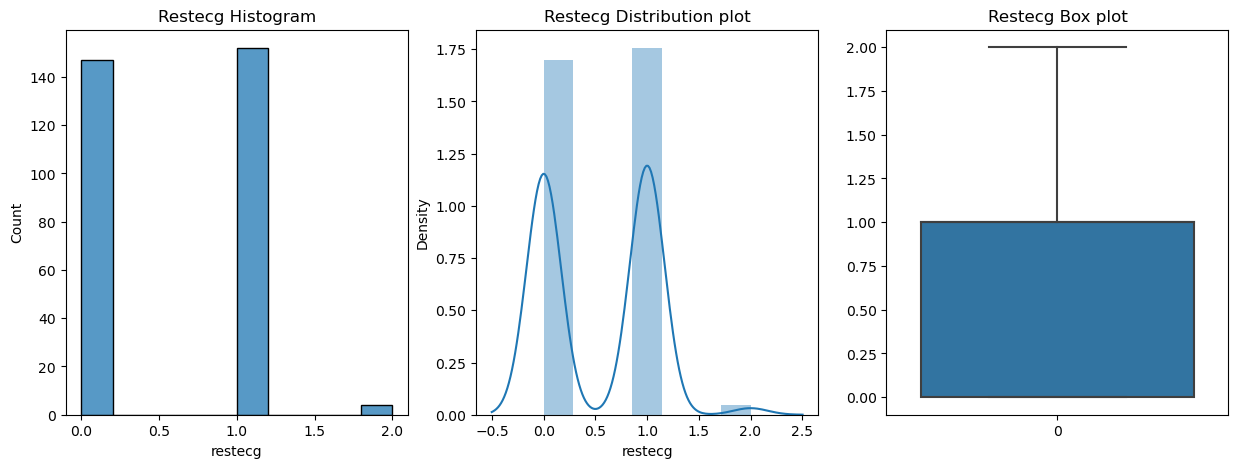

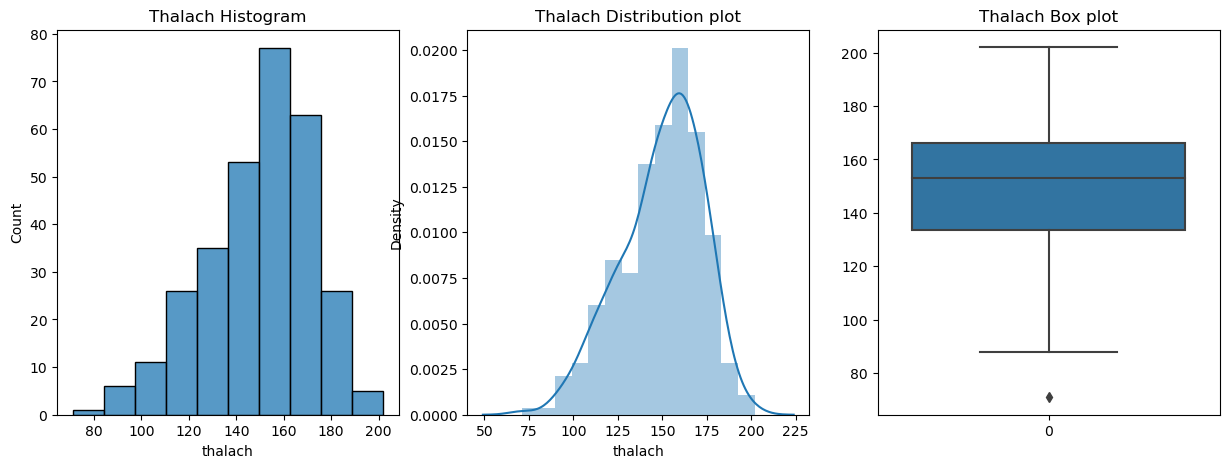

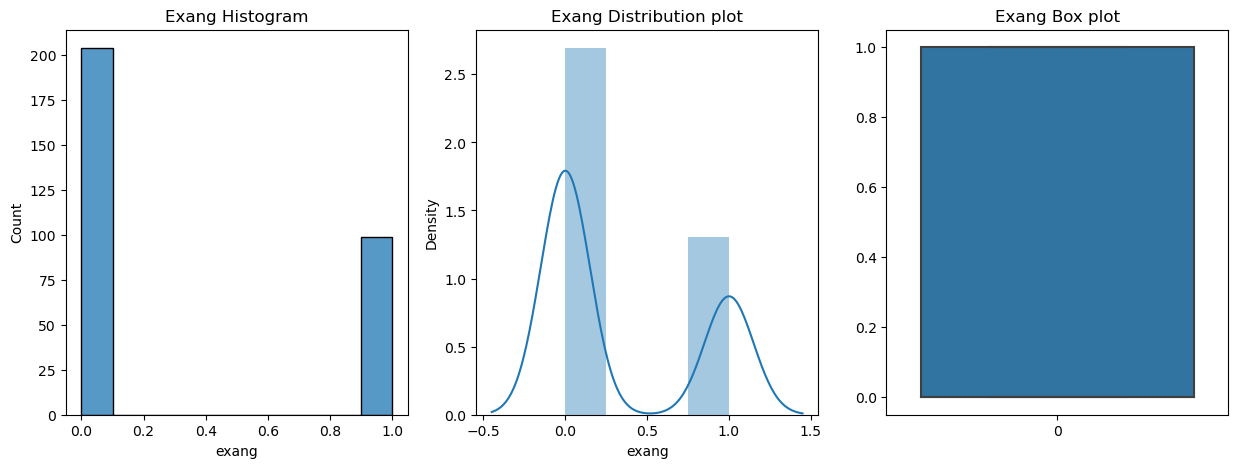

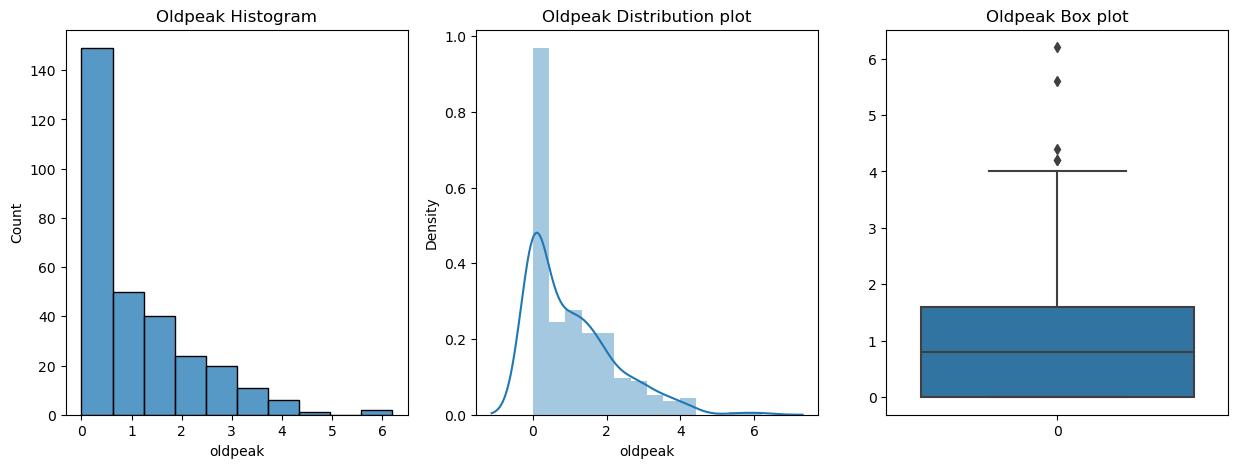

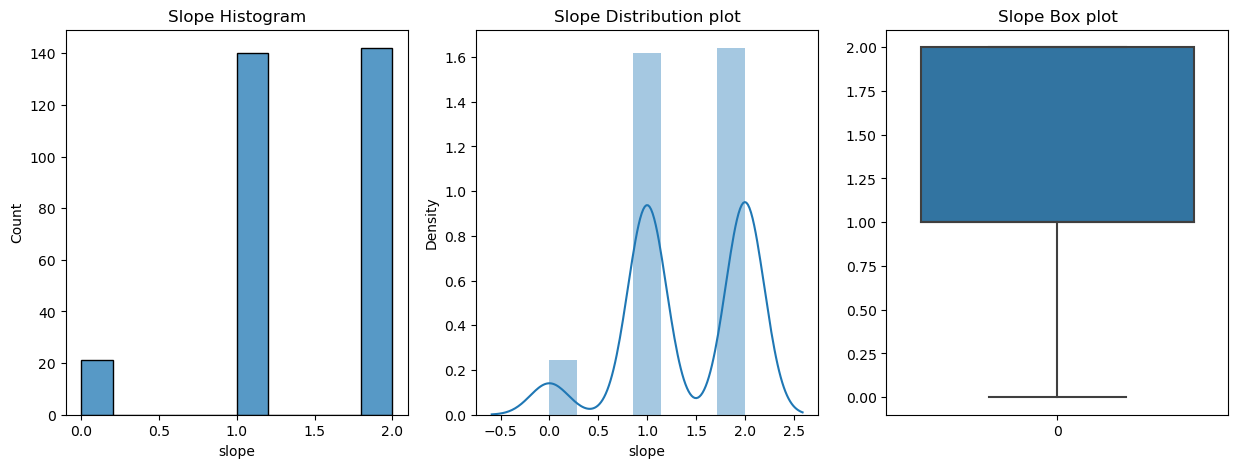

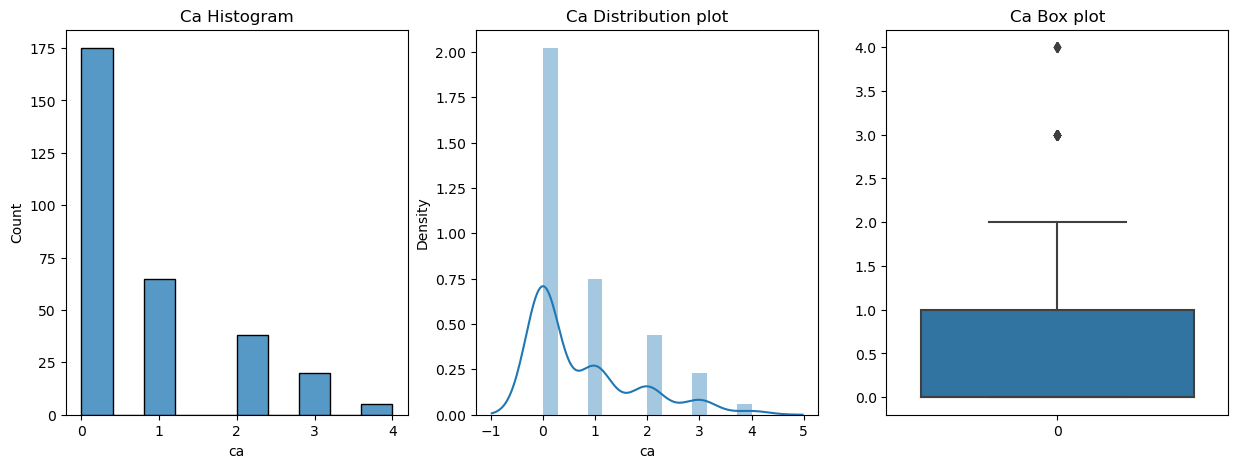

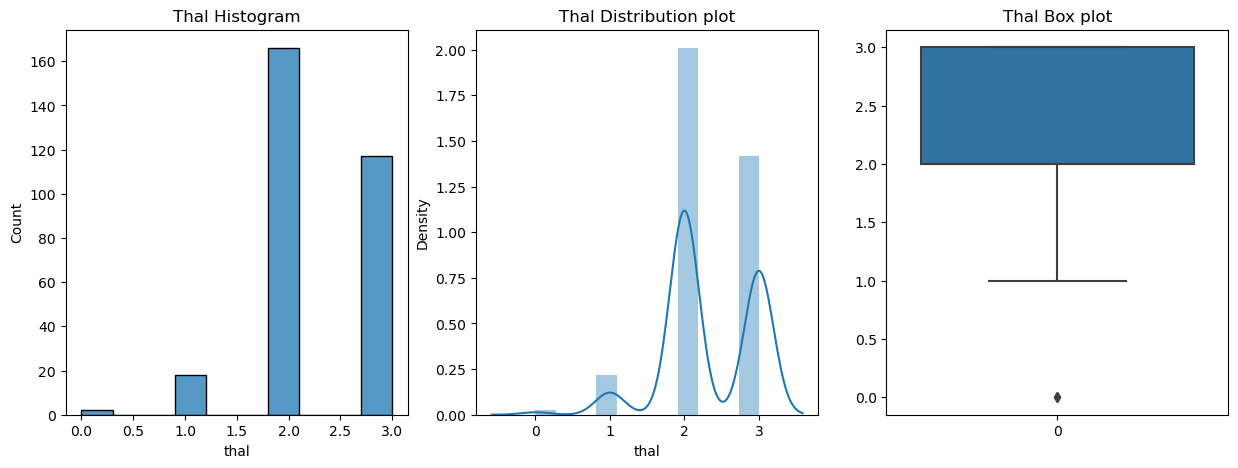

In [7]:
for i in df.iloc[:,0:-1]:
    plot_data(i, df)

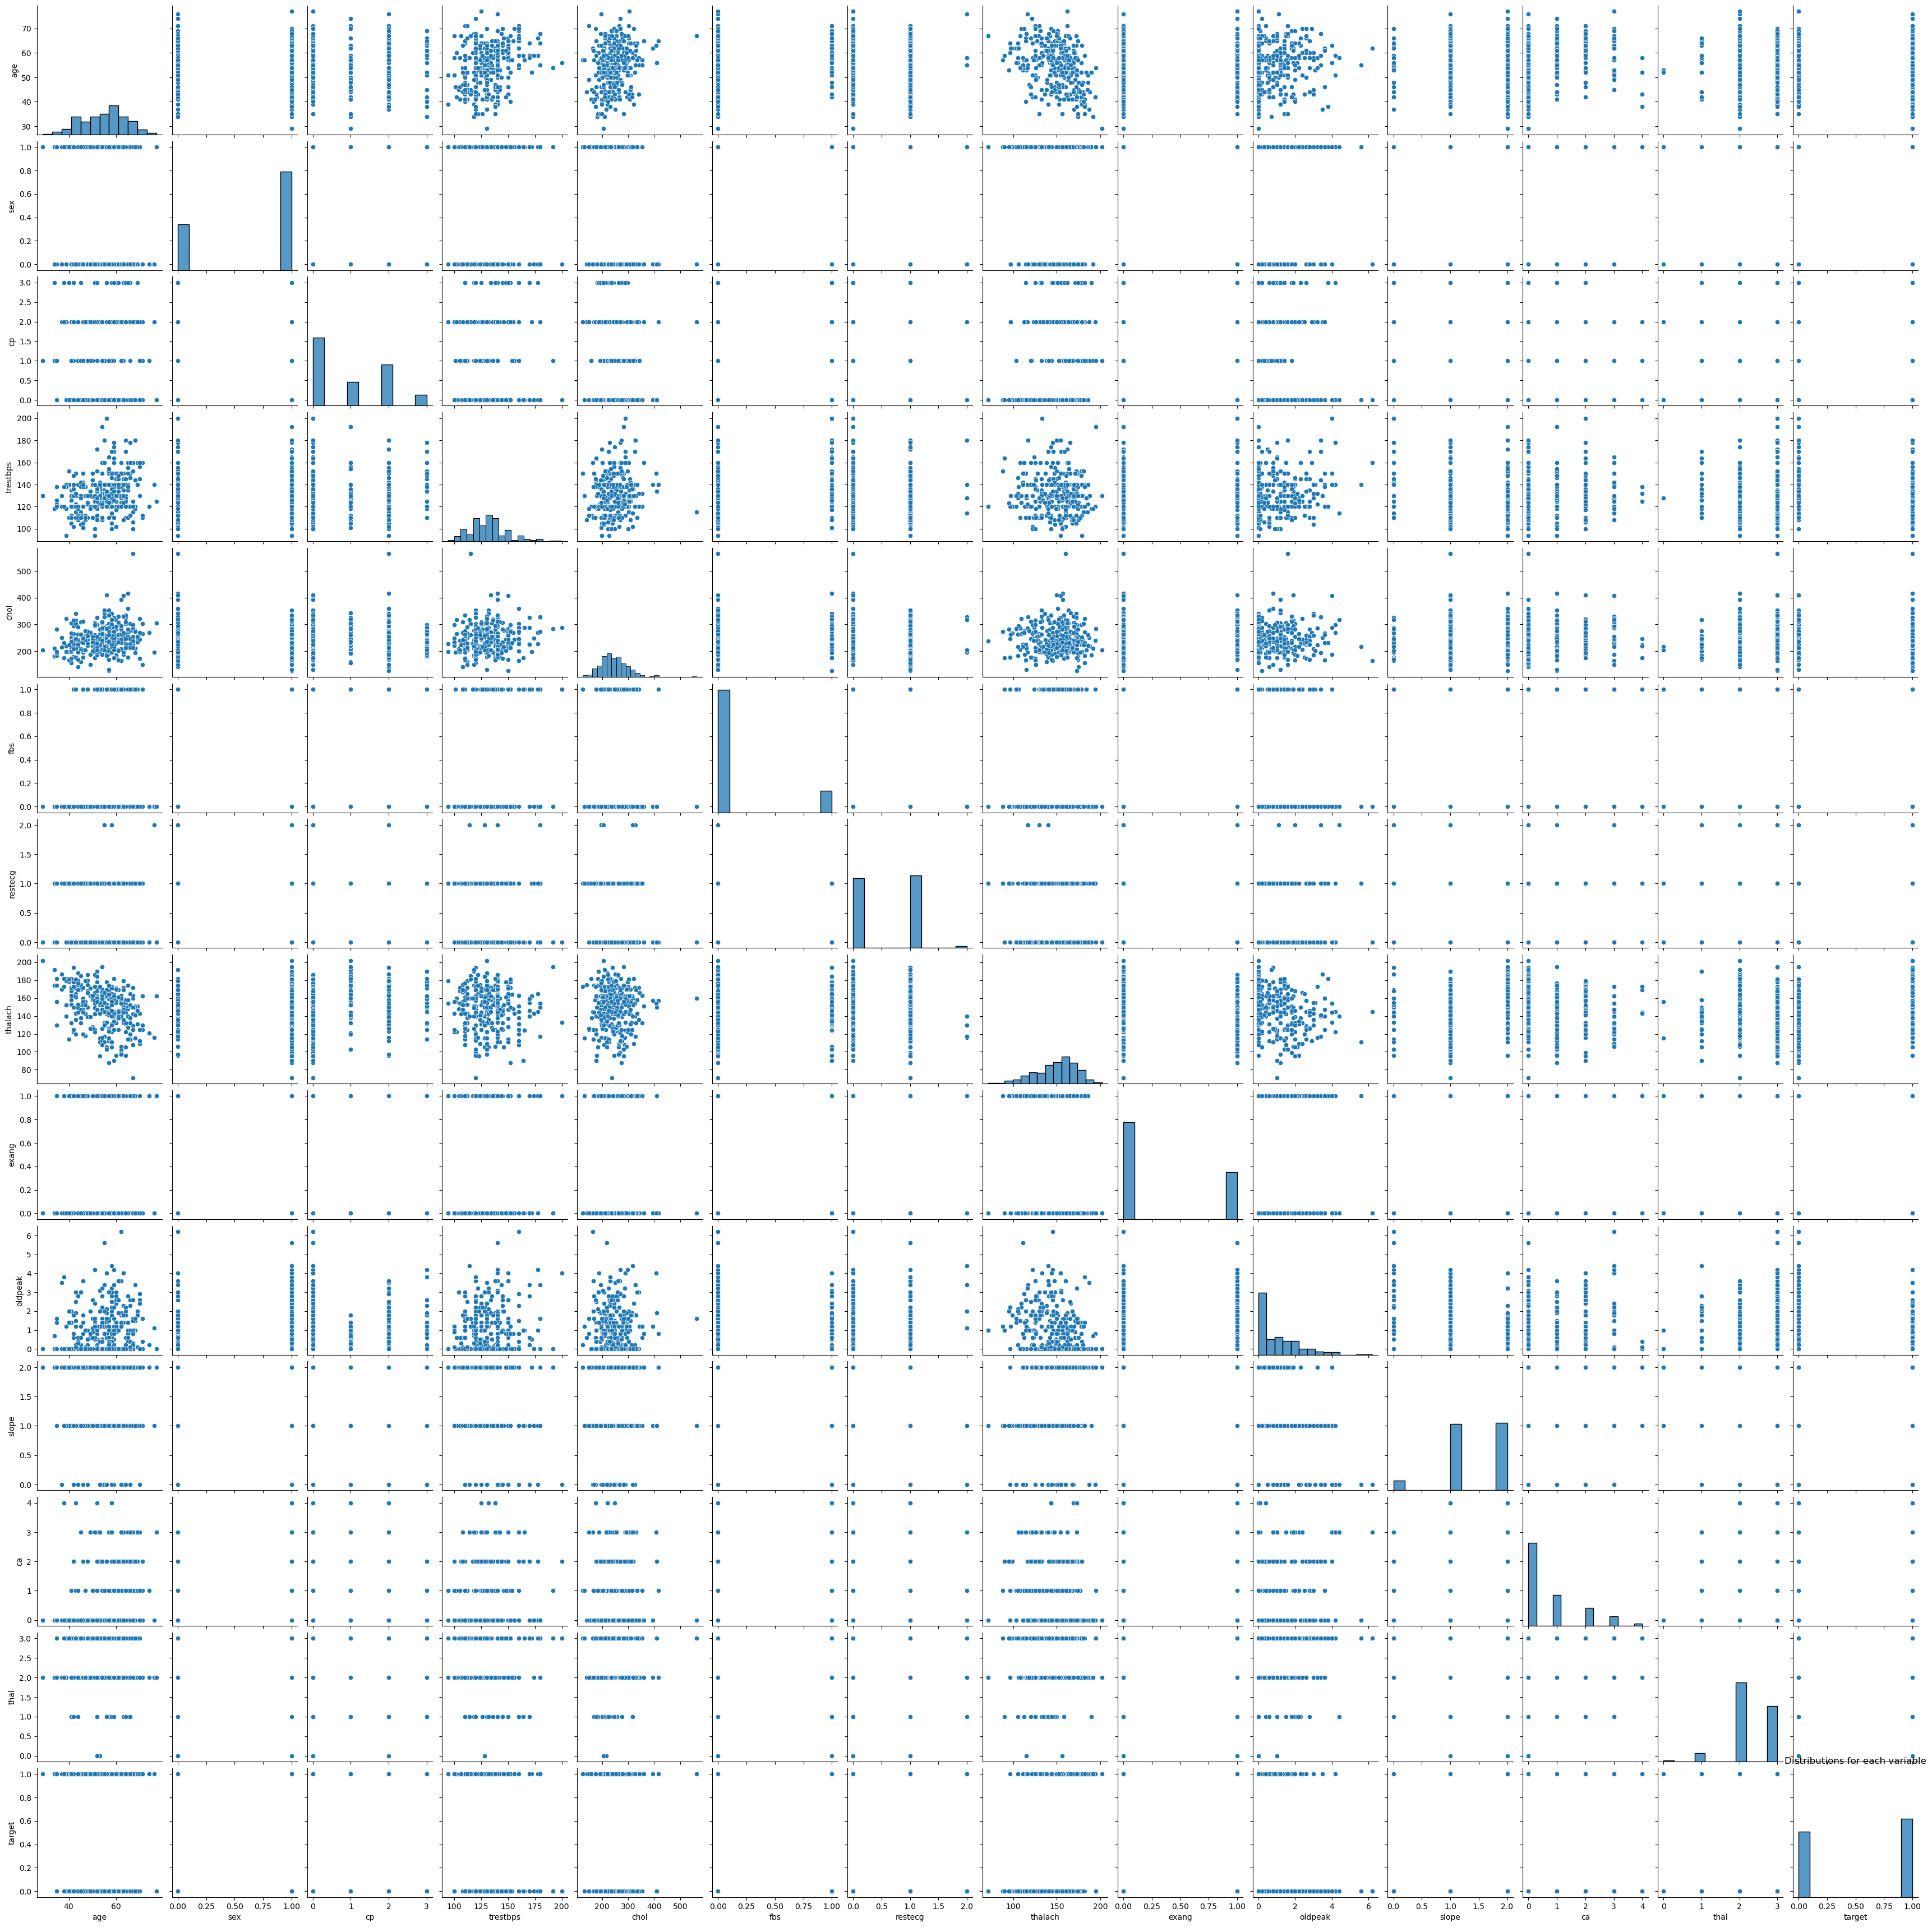

In [8]:
sns.pairplot(data=df)
plt.title('Distributions for each variable')
plt.show()

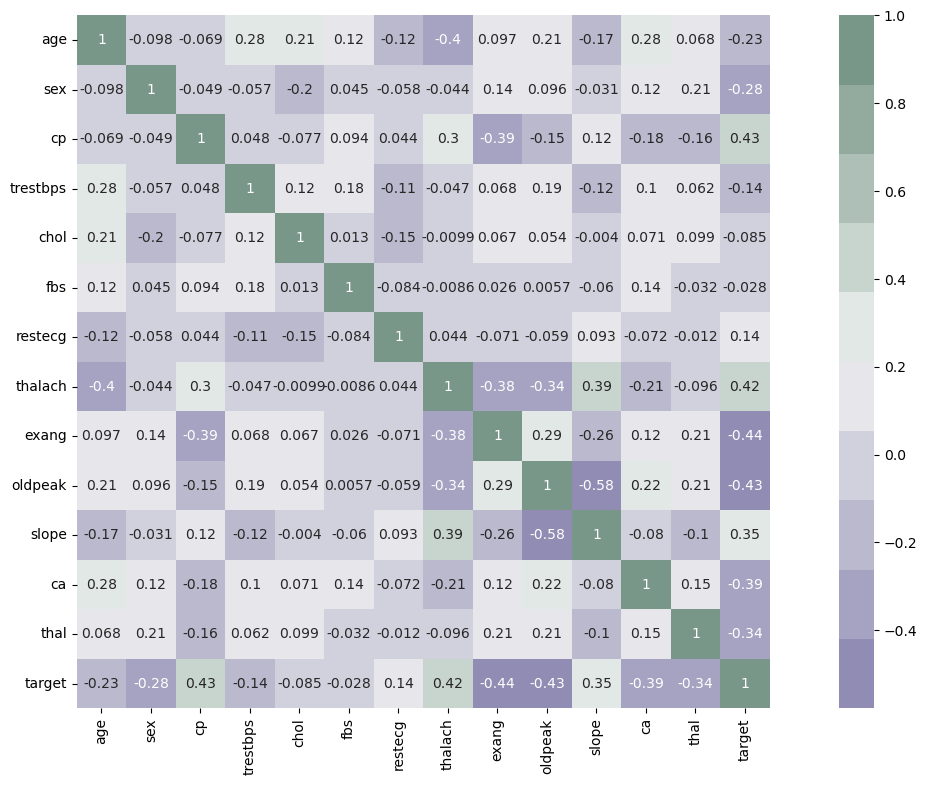

In [10]:
cmap = sns.diverging_palette(270,150,  s=30, l=60, n=10)
corrmat = df.corr()
plt.subplots(figsize=(18,9))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

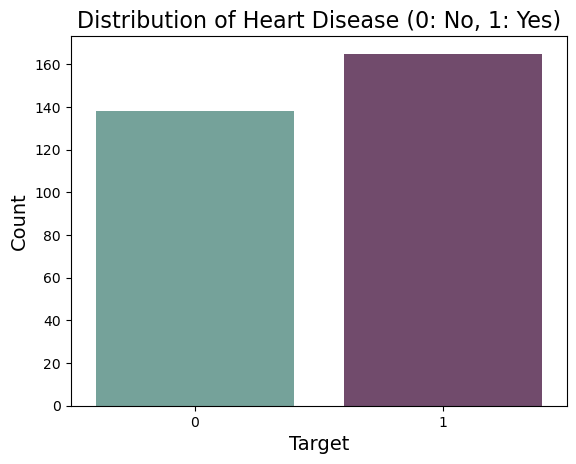

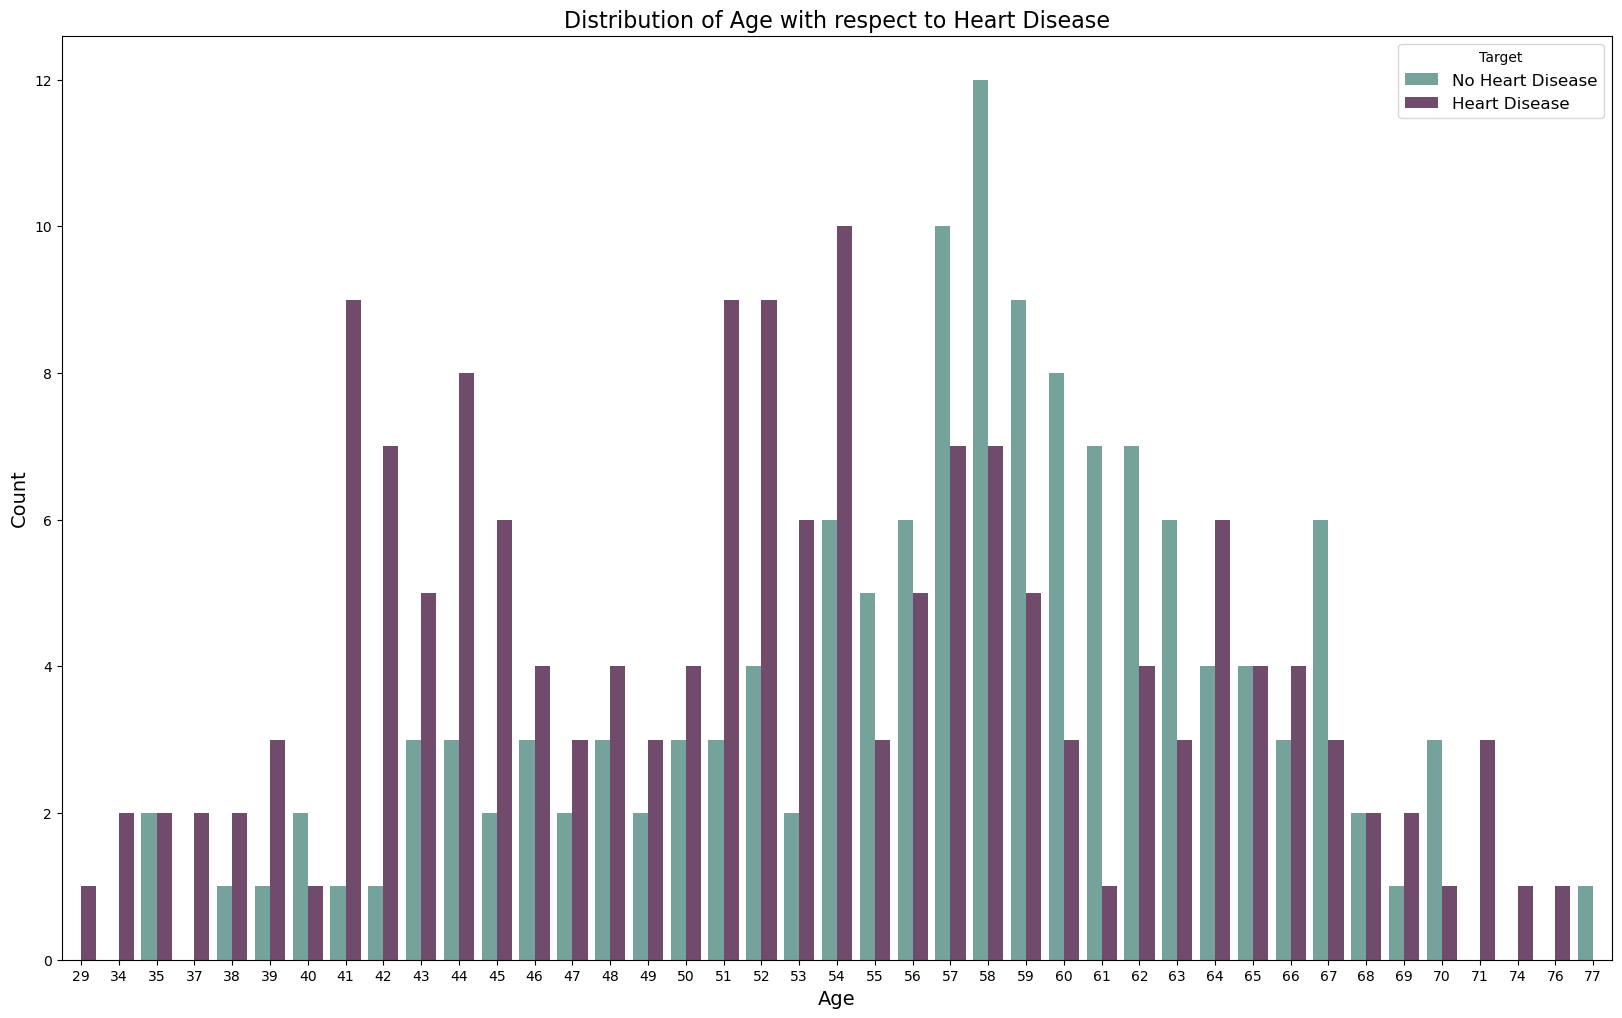

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for the countplot
cols = ["#6daa9f", "#774571"]

# Create a count plot for the target variable
sns.countplot(x=df["target"], palette=cols)
plt.title("Distribution of Heart Disease (0: No, 1: Yes)", fontsize=16)
plt.xlabel("Target", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Create a figure for the distribution of age
plt.figure(figsize=(20, 12))

# Create a count plot for the distribution of age with respect to the target variable
age_distribution = sns.countplot(x=df['age'], data=df, hue="target", palette=cols)
age_distribution.set_title("Distribution of Age with respect to Heart Disease", fontsize=16)
age_distribution.set_xlabel("Age", fontsize=14)
age_distribution.set_ylabel("Count", fontsize=14)

# Customize the legend
legend_labels = ["No Heart Disease", "Heart Disease"]
age_distribution.legend(title="Target", labels=legend_labels, fontsize=12)

# Show the plots
plt.show()


In [60]:
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

StandardScaler()

In [62]:
X = df.drop(['target'],axis=1)
y = df.target

In [63]:
from sklearn.preprocessing import StandardScaler

col_names = list(X.columns)
s_scaler = StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

# Describe the scaled features
description = X_df.describe().T
description


,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [64]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.

In [80]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

Epoch 1/50
8/8 [==============================] - 0s 24ms/step - loss: 0.4851 - accuracy: 0.7851 - val_loss: 0.3870 - val_accuracy: 0.8525
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4738 - accuracy: 0.7769 - val_loss: 0.3890 - val_accuracy: 0.8525
Epoch 3/50
8/8 [==============================] - 0s 17ms/step - loss: 0.4385 - accuracy: 0.8058 - val_loss: 0.3936 - val_accuracy: 0.8525
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4638 - accuracy: 0.7975 - val_loss: 0.3642 - val_accuracy: 0.8525
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4663 - accuracy: 0.8099 - val_loss: 0.4072 - val_accuracy: 0.8525
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4619 - accuracy: 0.8017 - val_loss: 0.3763 - val_accuracy: 0.8525
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.4569 - accuracy: 0.7934 - val_loss: 0.3781 - val_accuracy: 0.8525
Epoch 8/50
8/8 [=============

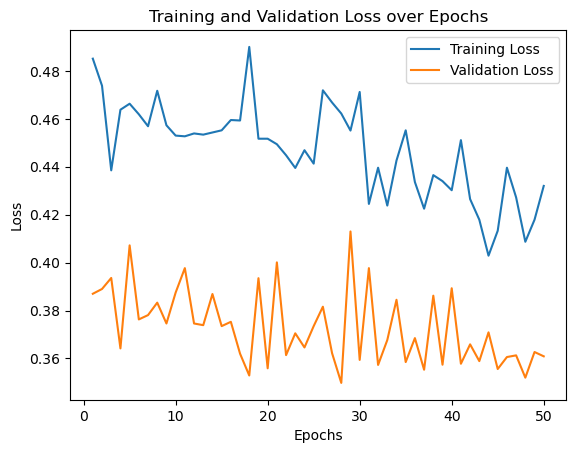

In [87]:
import matplotlib.pyplot as plt

# Training history (replace with your actual training history)
training_loss = [0.4851, 0.4738, 0.4385, 0.4638, 0.4663, 0.4619, 0.4569, 0.4717, 0.4573, 0.4530,
                 0.4527, 0.4539, 0.4534, 0.4543, 0.4552, 0.4595, 0.4593, 0.4900, 0.4517, 0.4517,
                 0.4494, 0.4448, 0.4395, 0.4469, 0.4413, 0.4719, 0.4668, 0.4622, 0.4551, 0.4712,
                 0.4245, 0.4396, 0.4238, 0.4426, 0.4552, 0.4336, 0.4225, 0.4365, 0.4340, 0.4302,
                 0.4511, 0.4265, 0.4179, 0.4029, 0.4133, 0.4396, 0.4272, 0.4087, 0.4179, 0.4320]

validation_loss = [0.3870, 0.3890, 0.3936, 0.3642, 0.4072, 0.3763, 0.3781, 0.3833, 0.3746, 0.3875,
                   0.3977, 0.3746, 0.3739, 0.3869, 0.3735, 0.3753, 0.3620, 0.3529, 0.3935, 0.3559,
                   0.4001, 0.3614, 0.3705, 0.3646, 0.3735, 0.3816, 0.3622, 0.3498, 0.4130, 0.3594,
                   0.3977, 0.3573, 0.3677, 0.3845, 0.3585, 0.3685, 0.3553, 0.3862, 0.3574, 0.3893,
                   0.3578, 0.3659, 0.3589, 0.3709, 0.3556, 0.3606, 0.3613, 0.3520, 0.3627, 0.3609]

# Create a list of epochs (1 to the number of epochs)
epochs = range(1, len(training_loss) + 1)

# Plot training loss and validation loss
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [84]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8852459016393442
Confusion Matrix:
[[25  4]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [88]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [89]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.8852459016393442

#### Accuracy :-

* The overall accuracy of the model is approximately 0.885 or 88.5%. This represents the ratio of correctly predicted samples (both true positives and true negatives) to the total number of samples.

### Confusion Matrix:

True Positives (TP): 29
True Negatives (TN): 25
False Positives (FP): 4
False Negatives (FN): 3
The confusion matrix provides a detailed breakdown of the model's performance on each class (0 and 1):

* The model correctly predicted 29 cases of class 1 (heart disease).
* It correctly predicted 25 cases of class 0 (no heart disease).
* It made 4 false positive errors (predicted as heart disease but actually no heart disease).
* It made 3 false negative errors (predicted as no heart disease but actually heart disease).

### Classification Report:

* Precision: Precision is a measure of how many of the positive predictions were correct. For class 0, precision is 0.89, and for class 1, precision is 0.88. This indicates that the model's positive predictions are accurate for both classes.
* Recall: Recall (also known as sensitivity or true positive rate) measures how many of the actual positive cases were correctly predicted. For class 0, recall is 0.86, and for class 1, recall is 0.91. This suggests that the model is good at identifying both positive cases.
* F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For both classes, the F1-score is around 0.88, indicating a good balance between precision and recall.
* Support: The support represents the number of samples in each class. For class 0, there are 29 samples, and for class 1, there are 32 samples.